In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
import torchvision
import torchvision.transforms as transforms


In [2]:
class Model(nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        self.fc1 = nn.Linear(784,128)
        self.fc2 = nn.Linear(128,64)
        self.fc3 = nn.Linear(64,10)
        
    def forward(self,x):
        x = x.view(-1,self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.sigmoid(self.fc3(x))
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

model = Model()

In [3]:
transform = transforms.Compose(
    [
        transforms.ToTensor()
    ]
)

trainset = torchvision.datasets.MNIST(root='./data', train=True, download = True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,batch_size=4,shuffle=True, num_workers=2)


testset = torchvision.datasets.MNIST(root='./data', train=False, download = True, transform=transform)
testloader = torch.utils.data.DataLoader(testset,batch_size=4,shuffle=False, num_workers=2)


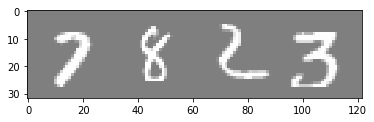

tensor(7) tensor(8) tensor(2) tensor(3)


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()
    
dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(' '.join(str(labels[j]) for j in range(4)))

In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(),lr=0.001)

In [6]:
#Training
from tqdm import tqdm
for epoch in range(2):
    running_loss = 0.0
    for i,data in enumerate(trainloader,0):
        inputs, labels = data
        
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i%2000 == 1999:
            print(f'{epoch+1}, {i+1}, loss: {running_loss / 2000}')
            running_loss=0.0
            
print('Saving Model')
PATH = './mnist.path'
torch.save(model.state_dict(),PATH)

C:\Users\Revanth\Anaconda3\lib\site-packages\torch\nn\functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


1, 2000, loss: 1.6458139175772666
1, 4000, loss: 1.5528795831799507
1, 6000, loss: 1.5260995951890945
1, 8000, loss: 1.5143625674843788
1, 10000, loss: 1.5127921352386475
1, 12000, loss: 1.5072659360766412
1, 14000, loss: 1.5056204158067703
2, 2000, loss: 1.5012087446451188
2, 4000, loss: 1.4972947173714637
2, 6000, loss: 1.4989312871694564
2, 8000, loss: 1.4957099953889847
2, 10000, loss: 1.4931325761079788
2, 12000, loss: 1.4943774565458299
2, 14000, loss: 1.4908183644413948
Saving Model


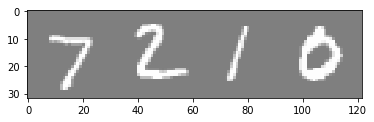

tensor(7) tensor(2) tensor(1) tensor(0)


In [7]:
#Test Data
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(' '.join(str(labels[j]) for j in range(4)))

In [8]:
model = Model()
model.load_state_dict(torch.load(PATH))

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images,labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print(f'Accuracy : {100* correct/total}')

C:\Users\Revanth\Anaconda3\lib\site-packages\torch\nn\functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Accuracy : 96.12
